In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import sklearn libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
# importing dataset
data = pd.read_csv("RedWhiteWineQuality.csv")

In [36]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [ ]:
# EDA

In [4]:
# Checking shape of data
data.shape

(6497, 13)

In [5]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# data description 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
# checking null values
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Checking duplicates
data[data.duplicated()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,white,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
data[data.duplicated()].count()

type                    1177
fixed acidity           1177
volatile acidity        1177
citric acid             1177
residual sugar          1177
chlorides               1177
free sulfur dioxide     1177
total sulfur dioxide    1177
density                 1177
pH                      1177
sulphates               1177
alcohol                 1177
quality                 1177
dtype: int64

In [10]:
# Removing duplicates
data.drop_duplicates(inplace=True)

In [11]:
data = data.reset_index(drop=True)

In [12]:
data[data.duplicated()].count()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# checking unique value distribution
data.type.value_counts()

white    3961
red      1359
Name: type, dtype: int64

In [14]:
# applying label encoder on type column
data['type']=LabelEncoder().fit_transform(data['type'])

In [15]:
data.type.value_counts() 

1    3961
0    1359
Name: type, dtype: int64

In [ ]:
# 1--> White wine
# 2--> Red wine

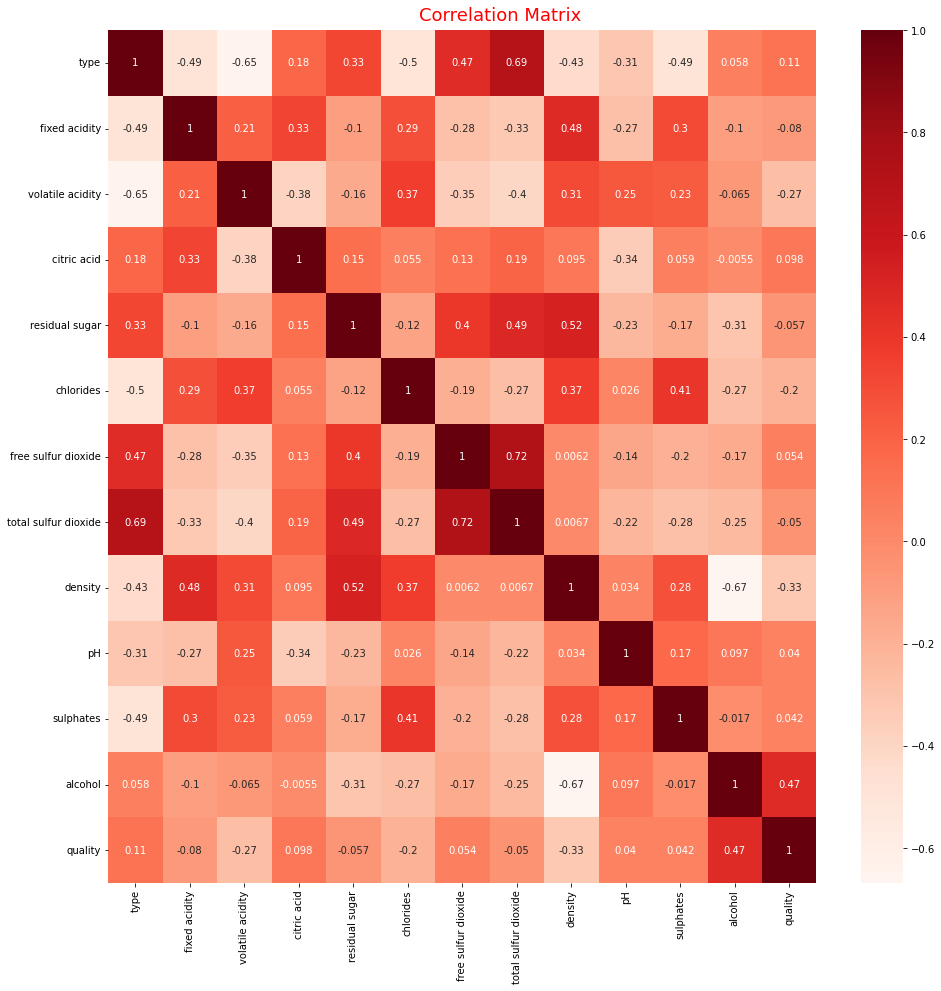

In [16]:
# data correlation
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.suptitle("Correlation Matrix",fontsize=18,color='red')
plt.tight_layout()

In [17]:
# Giving 0 and 1 rating based on quality
data.quality = data.quality.apply(lambda val:0 if val<6 else 1)

In [18]:
data.quality.value_counts()

1    3332
0    1988
Name: quality, dtype: int64

In [19]:
X = data.drop('quality',axis=1)

In [21]:
y = data['quality']

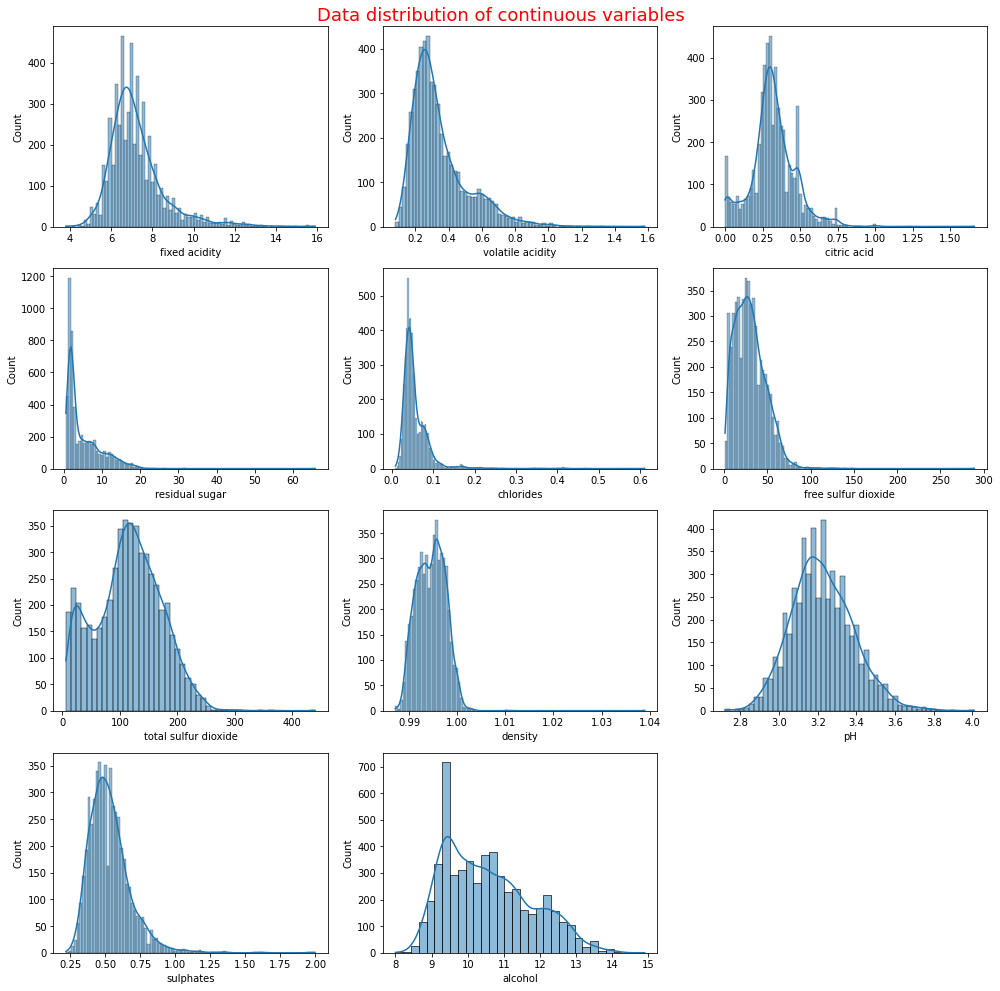

In [23]:
# hist plot of Continuous variable
plt.figure(figsize=(14,14))
for i, col in enumerate (X):
    if col!='type':
        plt.rcParams['axes.facecolor'] = 'white'
        ax = plt.subplot(4,3,i)
        sns.histplot(x=col,data=data,kde=True)
plt.suptitle("Data distribution of continuous variables",fontsize=18,color='red')
plt.tight_layout()

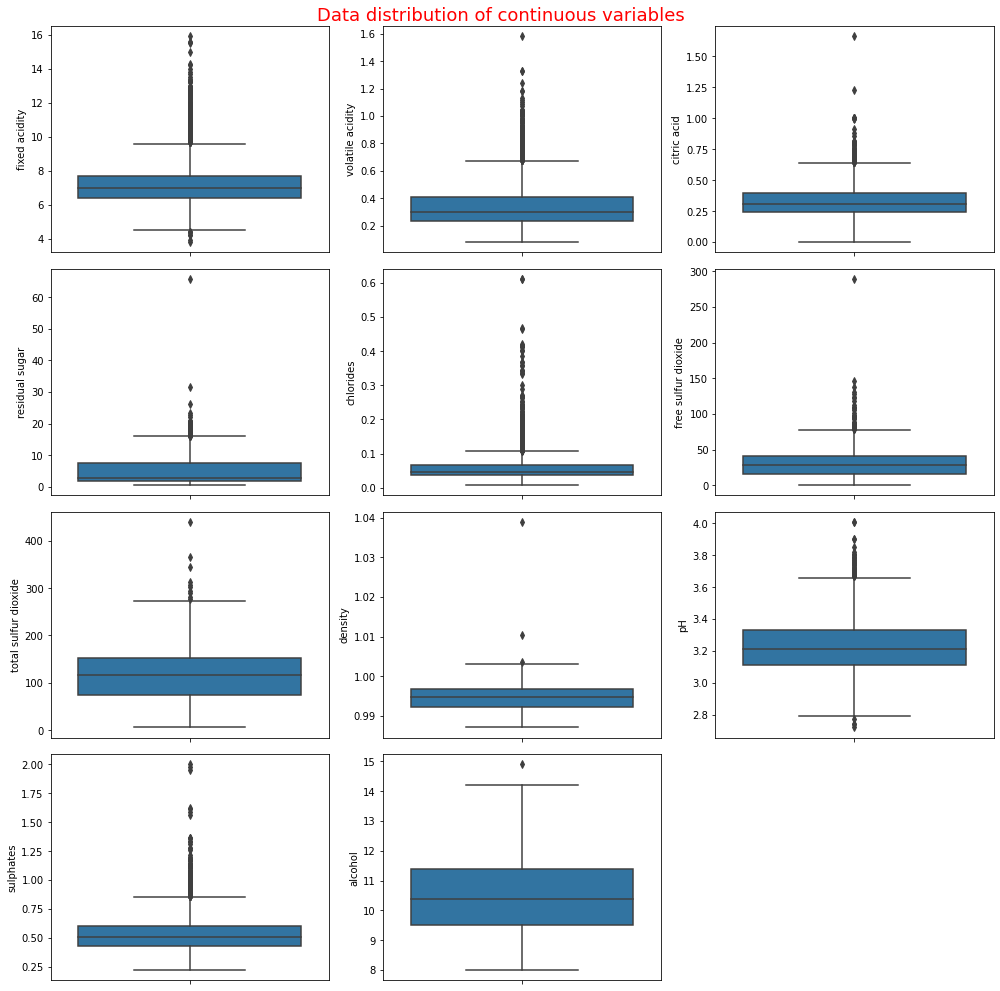

In [24]:
# Box plot of Continuous variable
plt.figure(figsize=(14,14))
for i, col in enumerate(X):
    if col!='type':
        ax = plt.subplot(4,3,i)
        sns.boxplot(y=col,data=data)
plt.suptitle("Data distribution of continuous variables",fontsize=18,color='red')
plt.tight_layout()

In [25]:
# Creating Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=4,stratify=y)

In [27]:
# Random Forest

rf = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=44)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_pred,y_test)*100:.2f}%")

Model Accuracy: 76.79%


In [28]:
# Decision Tree

DT = DecisionTreeClassifier(criterion='entropy',random_state=44,max_depth=4)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_pred,y_test)*100:.2f}%")

Model Accuracy: 73.97%


In [29]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_pred,y_test)*100:.2f}%")

Model Accuracy: 64.19%


In [30]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_pred,y_test)*100:.2f}%")

Model Accuracy: 68.61%


In [31]:
# Function for input data

def prediction(input_data):
    predict = rf.predict(input_data)

    if predict[0]==1:
        print("GOOD QUALITY WINE")
    else:
        print("BAD QUALITY WINE")

In [32]:
# Function call and Prediction

prediction([[0,10.3,0.32,0.45,6.4,0.073,5,13,0.9976,3.23,0.82,12.6]])

GOOD QUALITY WINE


In [33]:
prediction([[1,6.4,0.23,0.35,10.3,0.042,54,140,0.9967,3.23,0.47,9.2]])

BAD QUALITY WINE
